<a href="https://colab.research.google.com/github/cafechungkhoan/lyd-report/blob/main/DXS_20092021_Comment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LYD - Comment Sentiment Analysis**

*LYD là hệ thống áp dụng Deep Learning dùng để quét, tóm tắt, phân tích và dự báo cảm xúc của nhà đầu tư. Với mục đích hỗ trợ nghiệp vụ tư vấn IR (Investor Relation)*

**Dữ liệu input**: 
là dữ liệu bình luận (text) của nhà đầu tư trên mạng xã hội và các diễn đàn chứng khoán lớn. Quy mô tracking 700k user

**Các Model áp dụng**: 
Bert, transformer, SVM, PhoBERT 

### **LYD trả lời các câu hỏi chính**:
* **Mã cổ phiếu của doanh nghiệp có được nhà đầu tư yêu thích không?** (Áp dụng Text Classification Model xác định trạng thái cảm xúc của nhà đầu tư hiện tại là tích cực (hài lòng) hay tiêu cực (không hài lòng) về cổ phiếu YYY được xác định trước.)
* **Nhà đầu tư đang bàn tán gì về cổ phiếu doanh nghiệp?** (Áp dụng Topic Cluster Model phân loại các chủ đề chính cơ bản / kĩ thuật / thời sự & vĩ mô / tin đồn) của cổ phiếu YYY được xác định trước.)
* **Đâu là chủ đề nhà đầu tư thích nhất về cổ phiếu?** (Áp dụng BERT Text Summarize để tóm tắt nội dung comment)

---

In [ ]:
#@title Input Parameter
a = input('Nhập mã cần search: ')
b= input('Nhập giới hạn comment: ')

Nhập mã cần search: dxs
Nhập giới hạn comment: 1000


standardized data...
Processing step 1: Lower Case, Removed Https tag, Removed Stopwords
CPU times: user 1.22 ms, sys: 0 ns, total: 1.22 ms
Wall time: 1.24 ms
CPU times: user 2.14 ms, sys: 19 µs, total: 2.16 ms
Wall time: 2.17 ms
CPU times: user 988 µs, sys: 0 ns, total: 988 µs
Wall time: 995 µs
Done
2021-09-20 05:42:23,097 https://github.com/undertheseanlp/playground/releases/download/1.3.x/sa_svm_vlsp2016-sa_20210107.zip not found in cache, downloading to /tmp/tmpfik8tezw


100%|██████████| 2234880/2234880 [00:00<00:00, 37204718.87B/s]

2021-09-20 05:42:23,391 copying /tmp/tmpfik8tezw to cache at /root/.underthesea/models/sa_svm_vlsp2016-sa_20210107.zip
2021-09-20 05:42:23,398 removing temp file /tmp/tmpfik8tezw


Processing step 3: Tokenize
Processing step 4: POS Tagging
Processing step 5: Entity Regconize
Processing step 6: Vectorize PhoBERT
Process model SVM....
>>> Done


## **Phân tích người tham gia bình luận**
*   Xác định có vấn đề seeding bình luận ảo không
*   Xác định nhóm người theo sentiment



Số bình luận =  290 . Số người tham gia bình luận =  192 . Median comment / user =  1.0


Text(0.5, 1.0, 'ViolinPlot số lượng comment của người tham gia bình luận')

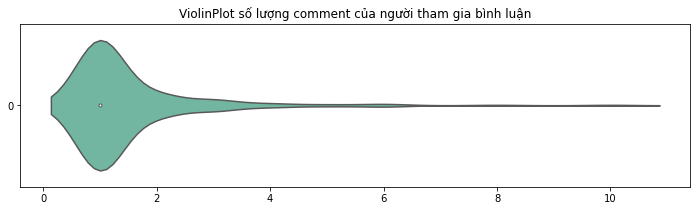

In [ ]:
#@title    

import matplotlib.pyplot as plt
import seaborn as sns
so_nguoi = data.groupby('user.name').count().reset_index()
print('Số bình luận = ',len(data),'. Số người tham gia bình luận = ', len(so_nguoi),'. Median comment / user = ', so_nguoi['originalContent'].median())
plt.figure(figsize = (12,3))
sns.violinplot(data=so_nguoi['originalContent'], orient="h", palette="Set2").set_title('ViolinPlot số lượng comment của người tham gia bình luận')

## **Network Grahp sentiment theo user**

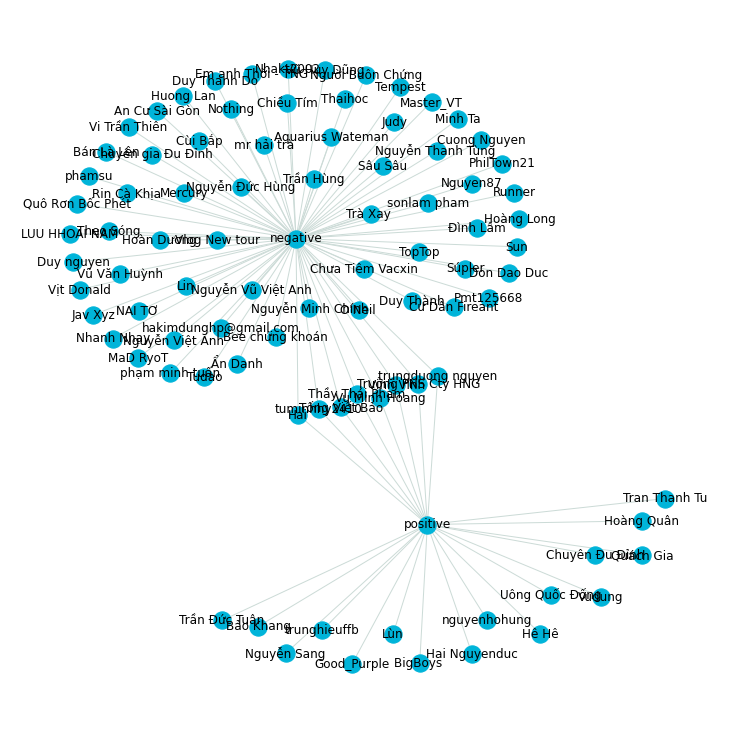

In [ ]:
#@title    
data3 = data.dropna()
import networkx as nx
G = nx.Graph()
import pandas as pd
G = nx.from_pandas_edgelist(data3, 'user.name','Sentiment')
from matplotlib.pyplot import figure
figure(figsize=(10,10))
nx.draw_kamada_kawai(G, with_labels=True, node_size=300, node_color='#00b4d9',edge_color="#CCDBD7") 

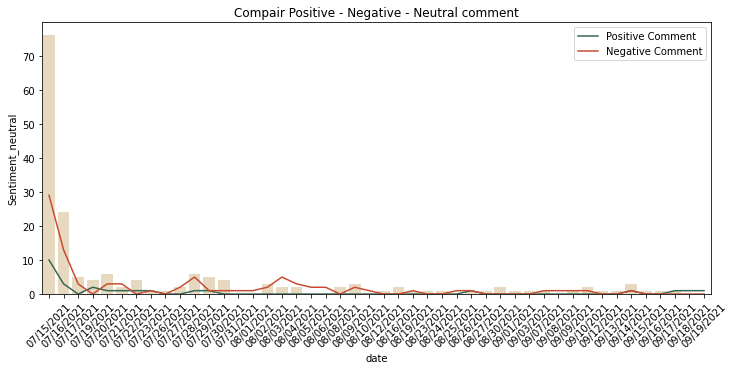

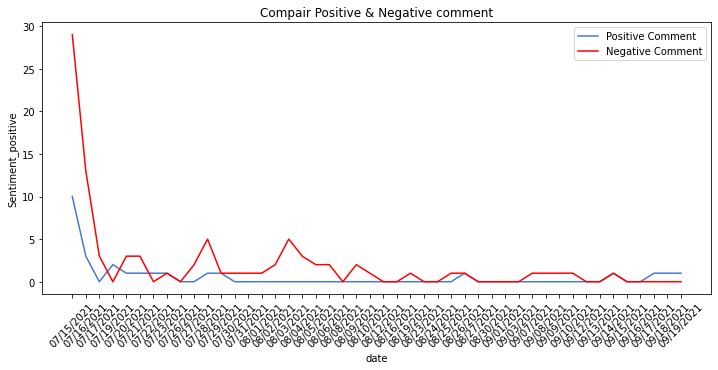

Text(0.5, 1.0, 'Topic Tin đồn')

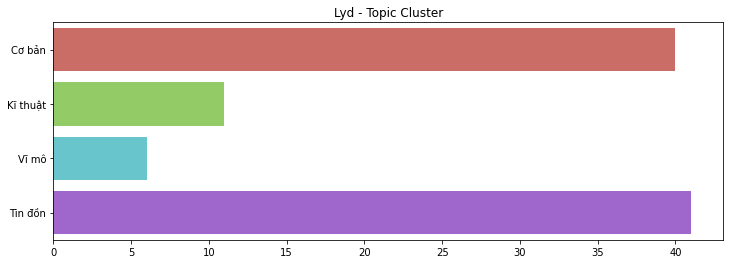

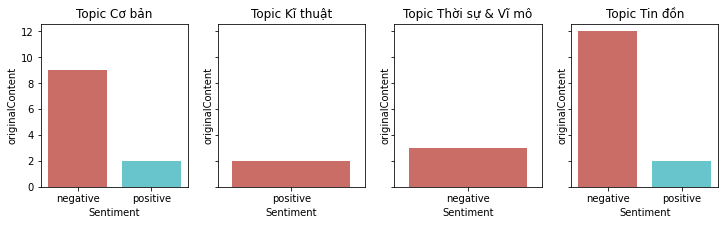

In [ ]:
#@title Số người comment từng loại { run: "auto", vertical-output: true }
a = co_ban.groupby('user.name')
print('Số comment cơ bản = ',len(co_ban),'. Số người tham gia comment = ', len(a))
b = ki_thuat.groupby('user.name')
print('Số comment kĩ thuật = ',len(ki_thuat),'. Số người tham gia comment = ', len(b))
c = vi_mo.groupby('user.name')
print('Số comment thời sự & vĩ mô = ',len(vi_mo),'. Số người tham gia comment = ', len(c))
d = tin_don.groupby('user.name')
print('Số comment tin đồn = ',len(tin_don),'. Số người tham gia comment = ', len(d))

Số comment cơ bản =  40 . Số người tham gia comment =  33
Số comment kĩ thuật =  11 . Số người tham gia comment =  9
Số comment thời sự & vĩ mô =  6 . Số người tham gia comment =  6
Số comment tin đồn =  41 . Số người tham gia comment =  39


## **Text Summarization using BERT**

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
data

,originalContent,date,user.name,Content_Processed,Sentiment,Content_Tokenize,topic_cluster
0,DXG siêu cổ phiếu sắp hình thành:))).,09/19/2021,Thầy Thái Phạm,dxg siêu cổ phiếu sắp hình thành,positive,dxg siêu cổ_phiếu sắp hình_thành,dxg cơ_bản sắp hình thành
1,Bay đi em....,09/18/2021,Hai Nguyenduc,bay đi em,positive,bay đi em,bay đi em
2,Hàng ngon nhỉ,09/17/2021,Vudung,hàng ngon nhỉ,positive,hàng ngon nhỉ,hàng ngon nhỉ
3,Con này trong HĐQT sao chưa có điện diện của quỹ Vinacapital nhỉ?,09/17/2021,Tran Quynh,con này trong hđqt sao chưa có điện diện của quỹ vinacapital nhỉ,None,con này trong hđqt sao chưa có điện diện của quỹ vinacapital nhỉ,con này trong hđqt sao điện diện của quỹ vinacapital nhỉ
4,Nhanh tay nào ACE cổ đông chiến lược DXG.,09/16/2021,Thầy Thái Phạm,nhanh tay nào ace cổ đông chiến lược dxg,None,nhanh tay nào ace cổ_đông chiến_lược dxg,nào ace cơ_bản dxg
5,DXG chuẩn bị vào con sóng thần vĩ đại nhất. ACE cổ đông chiến lược mà yêu mến chủ tịch Thìn thì húp nhanh.\n\nhttps://www.datxanh.vn/tin-tuc/chuyen-gia-ly-giai-gia-tri-bat-dong-san-van-on-dinh-trong-mua-dich.html,09/15/2021,Thầy Thái Phạm,dxg chuẩn bị vào con sóng thần vĩ đại nhất ace cổ đông chiến lược mà yêu mến chủ tịch thìn thì húp nhanh httpswwwdatxanhvntintucchuyengialygiaigiatribatdongsanvanondinhtrongmuadichhtml,None,dxg chuẩn_bị vào con sóng_thần vĩ_đại nhất ace cổ_đông chiến_lược mà yêu_mến chủ_tịch thìn thì húp nhanh httpswwwdatxanhvntintucchuyengialygiaigiatribatdongsanvanondinhtrongmuadichhtml,dxg vào thần vĩ đại nhất ace cơ_bản mà yêu mến thìn thì húp nhanh httpswwwdatxanhvntintucchuyengialygiaigiatribatdongsanvanondinhtrongmuadichhtml
6,Sao nước ngoài gôm con này tư khi lên sàn vậy các cổ đông .mà không thấy chạy .\nMấy ông mua trước ipo thì muốn bán cũng bán hết rồi .,09/14/2021,Howard Marks,sao nước ngoài gôm con này tư khi lên sàn vậy các cổ đông mà không thấy chạy mấy ông mua trước ipo thì muốn bán cũng bán hết rồi,None,sao nước_ngoài gôm con này tư khi lên sàn vậy các cổ_đông mà không thấy chạy mấy ông mua trước ipo thì muốn bán cũng bán hết rồi,sao cơ_bản gôm con này tư khi vậy các mà chạy mấy ông mua trước ipo thì muốn bán cũng rồi
7,Anh em mua IPO giá 32 đã thoát hàng hết chưa nhỉ. Tính ra gửi tiền DXS từ tháng 3 đến giờ là 6 tháng mà chưa đủ gốc để rút,09/14/2021,Đình Trọng Bùi,anh em mua ipo giá 32 đã thoát hàng hết chưa nhỉ tính ra gửi tiền dxs từ tháng 3 đến giờ là 6 tháng mà chưa đủ gốc để rút,None,anh_em mua ipo giá 32 đã thoát hàng hết chưa nhỉ tính ra gửi tiền dxs từ tháng 3 đến giờ là 6 tháng mà chưa đủ gốc để rút,mua ipo giá 32 đã hết chưa nhỉ tính ra gửi tiền dxs từ đến giờ là mà chưa đủ gốc để rút
8,DXG giải ngân được rồi nha cổ đông chiến lược.,09/14/2021,Thầy Thái Phạm,dxg giải ngân được rồi nha cổ đông chiến lược,None,dxg giải_ngân được rồi nha cổ_đông chiến_lược,dxg được rồi nha cơ_bản
9,Thấy ACE cổ đông chiến lược đang kêu gào DXG. Quách Gia dự đoán chiều nay khả năng sàn rất cao trắng bạch bên mua.,09/14/2021,Quách Gia,thấy ace cổ đông chiến lược đang kêu gào dxg quách gia dự đoán chiều nay khả năng sàn rất cao trắng bạch bên mua,positive,thấy ace cổ_đông chiến_lược đang kêu_gào dxg quách gia dự_đoán chiều nay khả_năng sàn rất cao trắng_bạch bên mua,thấy ace cơ_bản đang kêu gào dxg quách gia khả năng sàn rất cao trắng bạch bên mua
